In [9]:
library('igraph')
library('Matrix')
library('pracma')


In [10]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Transition Matrix for an Undirected Network


8 x 8 sparse Matrix of class "dgCMatrix"
                                                                  
[1,] .    1.0000000 .         .         . .         .    .        
[2,] 0.25 .         0.2500000 0.2500000 . 0.2500000 .    .        
[3,] .    0.5000000 .         .         . .         .    0.5000000
[4,] .    0.2500000 .         .         . 0.2500000 0.25 0.2500000
[5,] .    .         .         .         1 .         .    .        
[6,] .    0.3333333 .         0.3333333 . .         .    0.3333333
[7,] .    .         .         1.0000000 . .         .    .        
[8,] .    .         0.3333333 0.3333333 . 0.3333333 .    .        


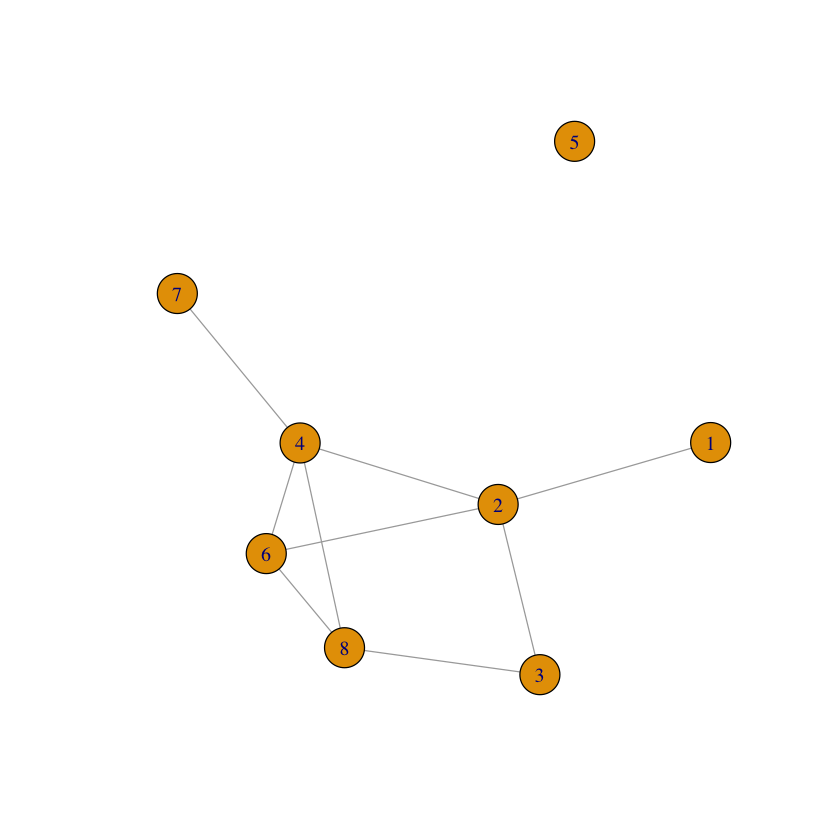

In [11]:
set.seed(0)
g = random.graph.game(8, 0.3)
plot(g)
print(create_transition_matrix(g))

### Transition Matrix for a Directed Network

8 x 8 sparse Matrix of class "dgCMatrix"
                                                                    
[1,] .    .         .    0.5000000 0.5000000 .         .         .  
[2,] 0.20 .         .    .         0.2000000 0.2000000 0.2000000 0.2
[3,] .    0.3333333 .    0.3333333 .         0.3333333 .         .  
[4,] 0.25 .         0.25 .         0.2500000 .         0.2500000 .  
[5,] .    0.5000000 .    .         .         .         .         0.5
[6,] .    0.3333333 .    .         0.3333333 .         0.3333333 .  
[7,] .    .         .    .         .         .         1.0000000 .  
[8,] .    0.2500000 0.25 .         0.2500000 .         0.2500000 .  


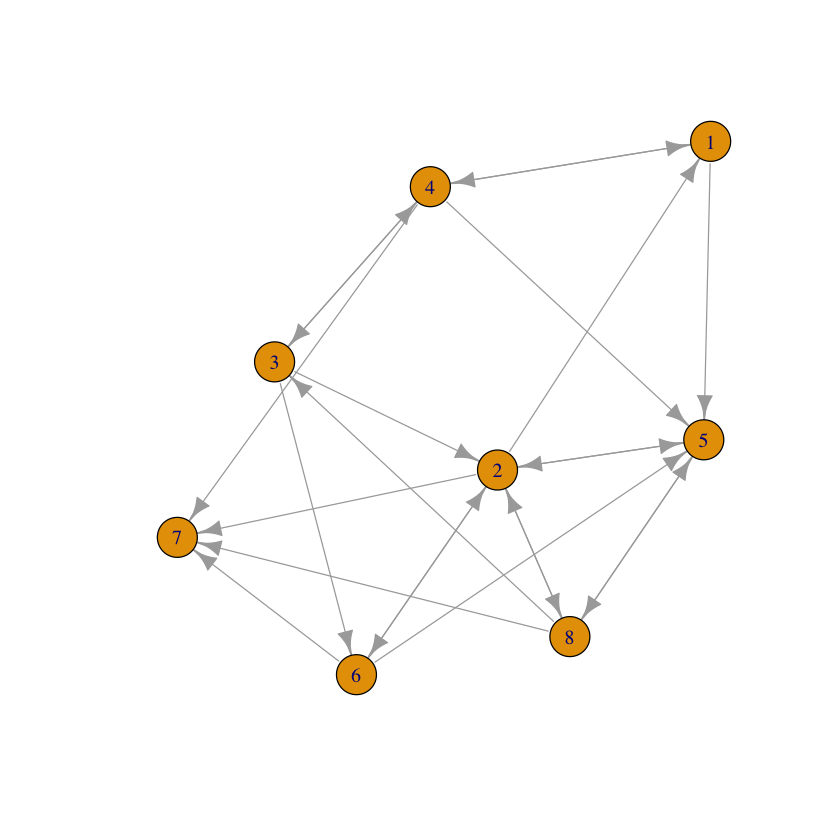

In [12]:
set.seed(1)
g = random.graph.game(8, 0.4, directed = T)
plot(g)
print(create_transition_matrix(g))

In [13]:
random_walk = function (g, num_steps, start_node, teleportation = 0.0, page_rank_prob = NULL,transition_matrix = NULL, medians = NULL ){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    alist = c()    
    v = start_node
#     telecount = 0
    for(i in 1:num_steps){

#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        
        PMF = transition_matrix[v, ]
       
        if (teleportation > 0.0 && sample(0:100) <= teleportation*100){
            if ( !is.null(page_rank_prob)){
                if ( !is.null(medians)){
                    if (sample(1:2, 1) == 1){
                        v <- medians[[1]][1]
                    }   else{
                        v <- medians[[2]][1]

                    }
                    
                }else{
#                  print(page_rank(g, directed = T)['vector'])
                 v <- sample(1:vcount(g), 1, prob = page_rank_prob)
                 }

            } else {
                v <- sample(1:vcount(g), 1)
            }
#             telecount = telecount + 1
        } else {
            if ( !is.null(medians)){
                c = 0
            }
            v <- sample(1:vcount(g), 1, prob = PMF)  
            }
        
        
          
            
        alist = append(alist, v)
    }
#     print(telecount)
    return(alist)
}

In [14]:
set.seed(1)
#v_last = random_walk(g, 15, 1)

In [15]:
graph_1 <- sample_pa(n=1000, m=4, directed=T)
graph_2 <- sample_pa(n=1000, m=4, directed=T)
print(graph_1)


IGRAPH d0dacc7 D--- 1000 3990 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from d0dacc7:
 [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 2  4-> 3  5-> 1  5-> 2  5-> 3  5-> 4
[11]  6-> 1  6-> 2  6-> 4  6-> 5  7-> 1  7-> 5  7-> 6  7-> 3  8-> 3  8-> 1
[21]  8-> 2  8-> 4  9-> 4  9-> 2  9-> 5  9-> 3 10-> 4 10-> 9 10-> 2 10-> 5
[31] 11-> 9 11-> 2 11-> 4 11-> 1 12-> 2 12-> 3 12-> 1 12-> 5 13-> 8 13-> 2
[41] 13-> 4 13-> 5 14-> 3 14-> 1 14-> 9 14-> 5 15-> 6 15-> 1 15-> 5 15-> 3
[51] 16-> 8 16-> 5 16-> 6 16-> 3 17-> 4 17-> 8 17-> 1 17-> 5 18-> 6 18-> 5
[61] 18-> 3 18->11 19-> 4 19-> 2 19-> 1 19-> 3 20-> 3 20-> 5 20-> 6 20-> 2
+ ... omitted several edges


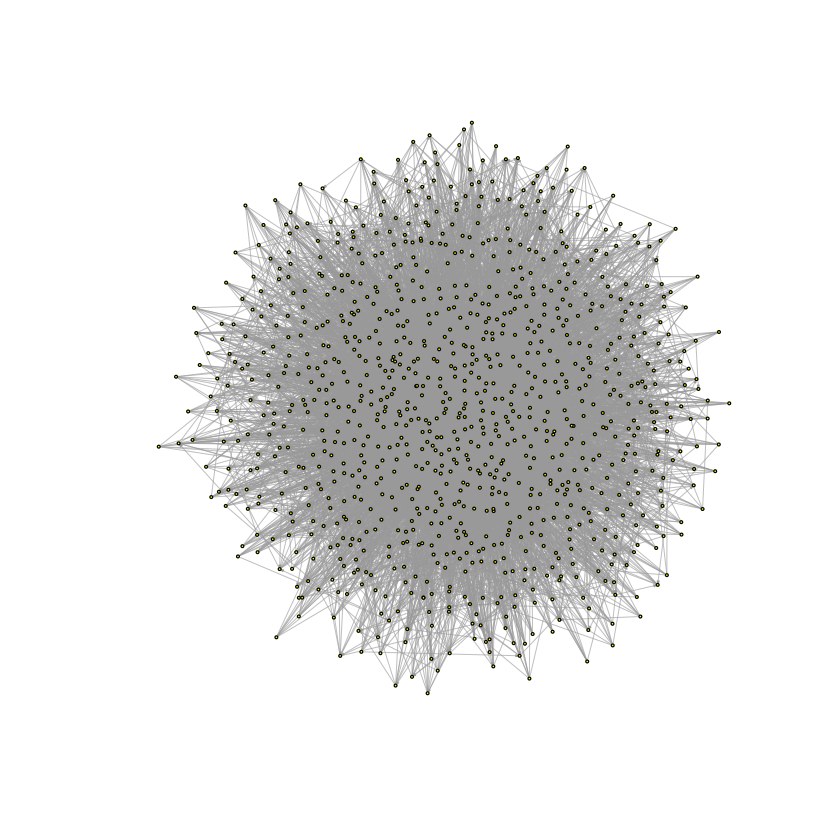

In [39]:

merged_graph = add_edges(graph_1, t(as_edgelist(permute(graph_2, sample(vcount(graph_2))))), attr = list())
plot(merged_graph,vertex.size=1,vertex.label=NA, vertex.color="yellow",
     edge.width=0.5,edge.arrow.size=0.1)

In [17]:

z = random_walk(merged_graph, 50, sample( 1:vcount(merged_graph),1))
i = 0
while(i < 100) {
    z = append(z, random_walk(merged_graph, 50, sample( 1:vcount(merged_graph),1)))
    i<-i+1 } 

In [18]:
#degree(merged_graph, 3)

[1] 1
[1] 0.5918452


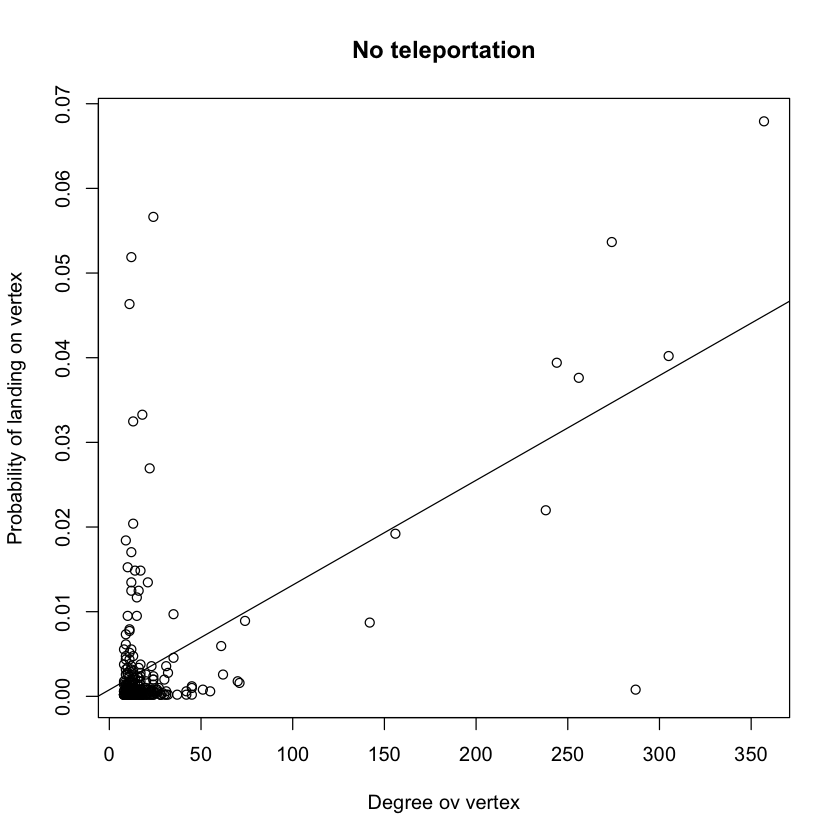

In [33]:
hello = as.data.frame(table(z))
summs = sum(hello['Freq'])
# print(hello)
probability = c()
deg= c()
print(length(hello['z']))
for(i in 1:nrow(hello['z'])){

        probability = append(probability, hello[i,'Freq']/summs )
        deg = append(deg ,degree(merged_graph, hello[i,'z']))
    }
# print(lengths(hello['z']))
# print(lengths(probability))
# print(probability)
# print(hello['z'])

plot(deg,probability, main="No teleportation", xlab="Degree ov vertex", ylab="Probability of landing on vertex")
abline(lm(probability ~ deg ))
print(cor(probability,deg))
#print(lm(probability ~ deg ))
# print(a)

In [136]:
#print(hello[3 ,'Freq'])


[1] 76


In [20]:
zz = random_walk(merged_graph,50, sample(1:vcount(merged_graph),1),0.15)
i = 0
while(i < 100) {
    zz = append(zz, random_walk(merged_graph,50, sample(1:vcount(merged_graph),1),0.15))
    i<-i+1 } 

[1] 1
[1] 0.5103778


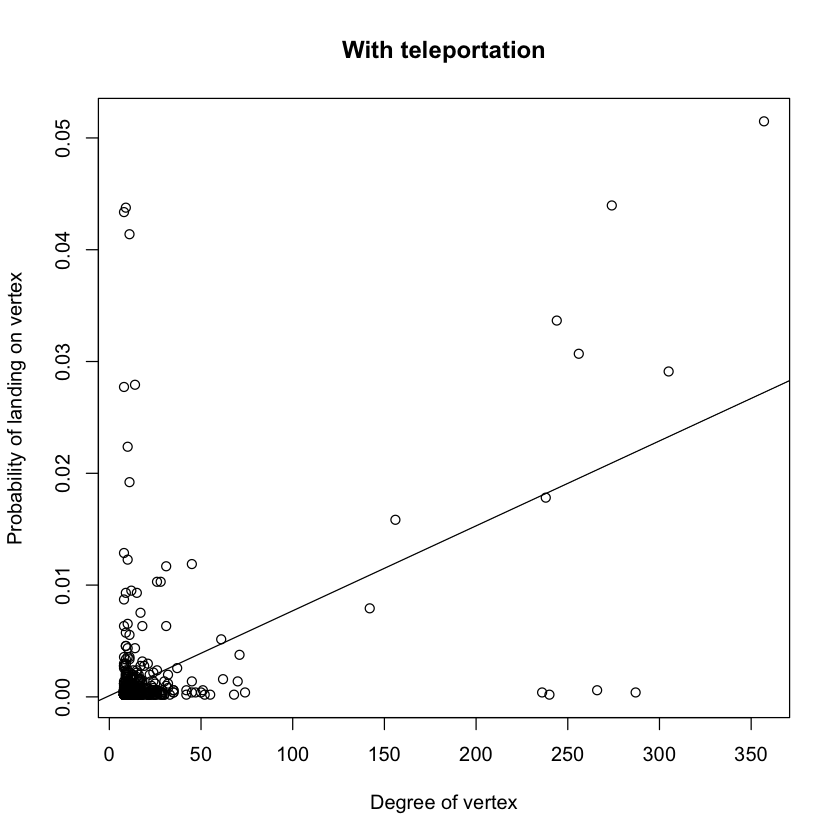

In [34]:
hello = as.data.frame(table(zz))
# print(hello)
summs = sum(hello['Freq'])

probability = c()
deg= c()
print(length(hello['zz']))
for(i in 1:nrow(hello['zz'])){

        probability = append(probability, hello[i,'Freq']/summs )
        deg = append(deg ,degree(merged_graph, hello[i,'zz']))
    }
# print(lengths(hello['z']))
# print(lengths(probability))
# print(probability)
# print(hello['z'])

plot(deg,probability, main="With teleportation", xlab="Degree of vertex", ylab="Probability of landing on vertex")
abline(lm(probability ~ deg ))
print(cor(probability,deg))
#print(lm(probability ~ deg ))

# print(a)

In [22]:
# print(sum(page_rank(merged_graph, directed = T)$vector))
print(page_rank(merged_graph, directed = T)$vector[5])
page_rank_prob = page_rank(merged_graph, directed = TRUE)[['vector']]
vertex_id_p = random_walk(merged_graph,50, sample(1:vcount(merged_graph),1),0.15, page_rank_prob)

i = 0
while(i < 100) {
    vertex_id_p = append(vertex_id_p, random_walk(merged_graph,50, sample(1:vcount(merged_graph),1),0.15),page_rank_prob)
    i<-i+1 }


[1] 0.0313378


Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 100

“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning

“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be us

“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values

“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values

“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values

“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values) else c(x[1L:after], values, :
“the condition has length > 1 and only the first element will be used”Warning message in 1L:after:
“numerical expression has 1000 elements: only the first used”Warning message in (after + 1L):lengx:
“numerical expression has 1000 elements: only the first used”Warning message in if (!after) c(values, x) else if (after >= lengx) c(x, values) else c(x[1L:after], :
“the condition has length > 1 and only the first element will be used”Warning message in if (after >= lengx) c(x, values

[1] 1
[1] 0.5342521


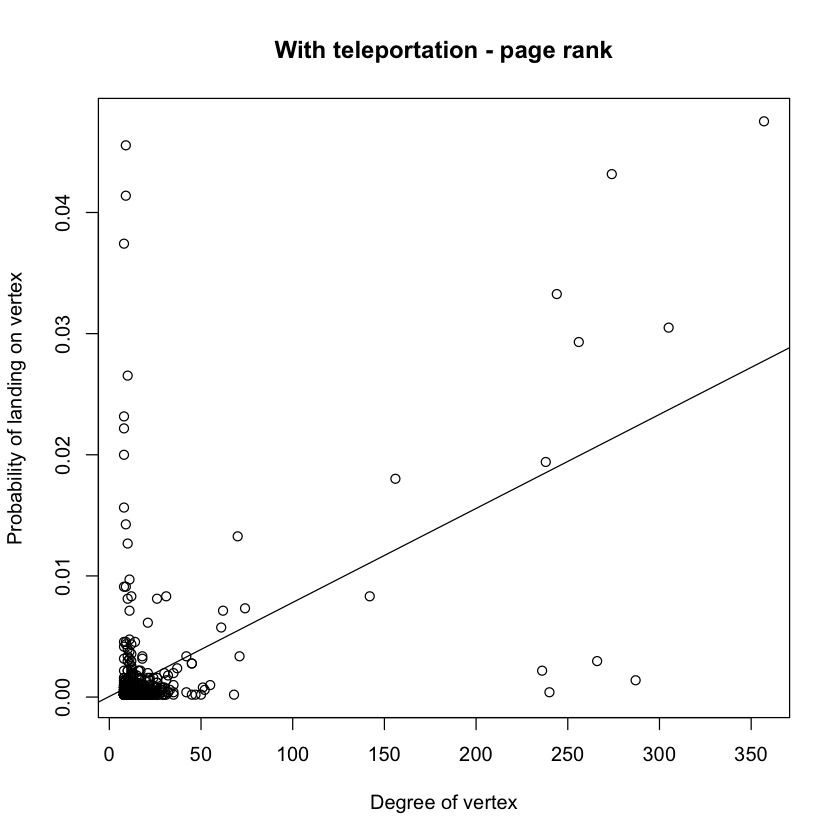

In [36]:
hello = as.data.frame(table(vertex_id_p))
summs = sum(hello['Freq'])

probability = c()
deg= c()
print(length(hello['vertex_id_p']))
for(i in 1:nrow(hello['vertex_id_p'])){

        probability = append(probability, hello[i,'Freq']/summs )
        deg = append(deg ,degree(merged_graph, hello[i,'vertex_id_p']))
    }
plot(deg,probability, main="With teleportation - page rank", xlab="Degree of vertex", ylab="Probability of landing on vertex")
abline(lm(probability ~ deg ))
print(cor(probability,deg))

#print(lm(probability ~ deg ))

In [28]:
# named_vertex = list()
# for (i in seq_along(page_rank_prob)){
#     print( list(i,page_rank_prob[[i+1]]))
# # named_vertex =  append(named_vertex)

# }
# print(named_vertex[[1]])
named_vertex = data.frame('x'=1:length(page_rank_prob), 'y'=page_rank_prob)
named_vertex <- named_vertex[order(named_vertex[['y']]), ]
medianss = list(named_vertex[nrow(named_vertex)%/%2,][['x']], named_vertex[nrow(named_vertex)%/%2+1,][['x']])
print(medianss[[1]][1])
# print(named_vertex)
# print(nrow(named_vertex)%/%2)




[1] 705


In [29]:

vertex_id = random_walk(merged_graph,50, sample(1:vcount(merged_graph),1),0.15, page_rank_prob, medians=medianss)

i = 0
while(i < 100) {
    vertex_id = append(vertex_id, random_walk(merged_graph,50, sample(1:vcount(merged_graph),1),0.15,page_rank_prob, medians=medianss))
    i<-i+1 }
print('hi')

[1] "hi"


[1] 1
[1] 0.383441


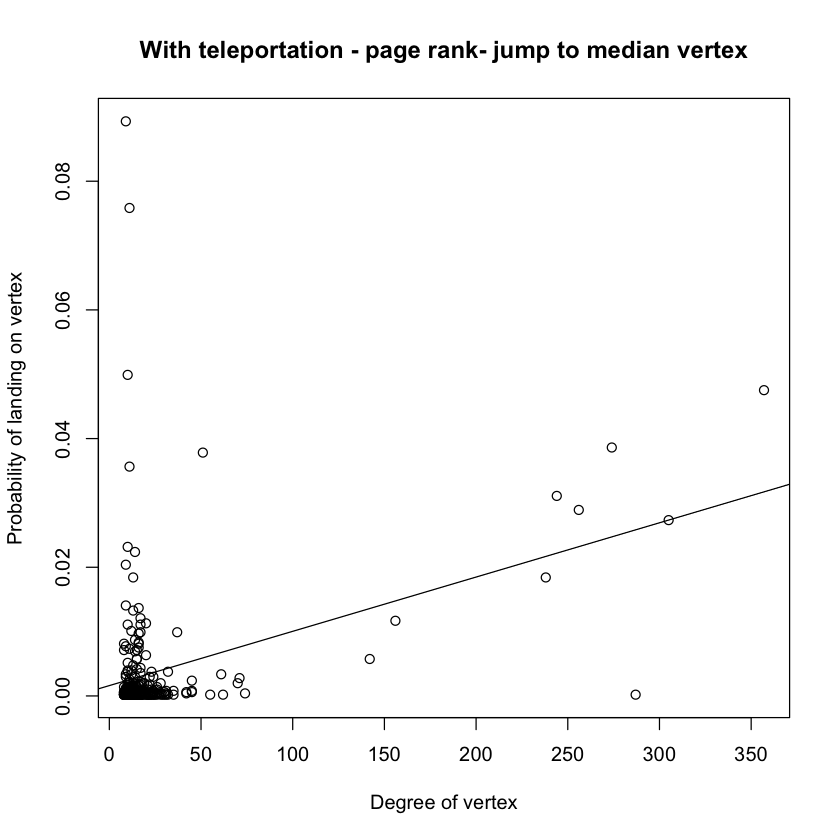

In [38]:
median_jump = as.data.frame(table(vertex_id))
summs = sum(median_jump['Freq'])

probability = c()
deg= c()
print(length(median_jump['vertex_id']))
for(i in 1:nrow(median_jump['vertex_id'])){

        probability = append(probability, median_jump[i,'Freq']/summs )
        deg = append(deg ,degree(merged_graph, median_jump[i,'vertex_id']))
    }
plot(deg,probability, main="With teleportation - page rank- jump to median vertex", xlab="Degree of vertex", ylab="Probability of landing on vertex")
abline(lm(probability ~ deg ))
print(cor(probability,deg))

#print(lm(probability ~ deg ))

In [40]:
print('medianss:')
print(medianss[[1]][1] )
print(medianss[[2]][1] )
print(median_jump[order(-median_jump['Freq']), ])


[1] "medianss:"
[1] 705
[1] 586
    vertex_id Freq
225       705  451
204       586  383
151       324  252
2           2  240
1           1  195
259       918  191
200       541  180
3           3  157
4           4  146
5           5  138
224       687  117
67        104  113
238       788  103
6           6   93
173       420   93
89        171   71
203       585   69
248       849   67
29         44   61
9           9   59
36         54   57
180       452   56
208       606   56
260       920   51
14         16   50
35         52   50
62         93   49
113       215   44
258       916   42
166       397   41
177       443   41
182       464   39
106       200   38
80        137   37
85        162   36
231       743   36
45         63   35
160       368   32
8           8   29
116       221   29
268       954   29
39         57   26
218       653   24
21         32   22
192       508   21
100       193   20
198       538   20
16         23   19
94        180   19
266       948   19

ERROR: Error in degree(vertex_id, 705): Not a graph object


In [32]:
print(hello[order(-hello['Freq']), ])

    vertex_id_p Freq
2             2  240
263         324  230
1             1  218
665         918  209
416         541  189
3             3  168
5             5  154
4             4  148
99          104  134
514         687  117
603         820  112
583         788  101
6             6   98
9             9   91
667         920   79
351         452   72
54           54   67
444         585   64
691         954   49
90           93   46
343         443   46
8             8   42
52           52   42
314         397   42
125         137   41
551         743   41
23           23   37
32           32   36
142         162   36
56           57   31
11           11   29
147         171   24
164         193   23
447         588   23
626         849   23
327         420   22
630         858   22
414         538   21
491         653   20
380         496   19
389         508   18
13           13   17
30           30   17
207         251   17
385         503   17
74           75   16
270         3